# DATA VISUALIZATION 

## Step 1: Data Cleaning

In [649]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [650]:
df=pd.read_csv('DS_DATESET.csv')

In [651]:
missing_data = df.isnull()

Based on the summary above, each column has 10000 rows of data, 34 columns. Out of which following columns are empty:

    1. Certifications/Achievement/ Research papers
    2. Link to updated Resume (Google/ One Drive link preferred)
    3. link to Linkedin profile

As these 3 columns are empty, we drop these colums.


In [652]:
a=df.drop(["Certifications/Achievement/ Research papers",
                  "Link to updated Resume (Google/ One Drive link preferred)","link to Linkedin profile"], axis = 1)

In [653]:
b=df.astype({'CGPA/ percentage': 'float','Rate your written communication skills [1-10]': 'int32',"Rate your verbal communication skills [1-10]":"int32"}).dtypes

## Step 2: Data Visualization Model

In this step we have to built various graphs based on questions in problem statement

    1. The number of students applied to different technologies.



In [654]:
x=df["Areas of interest"]
y=df["Label"]

In [655]:
categories=list(x)

In [656]:
category_counts = {}
for category in categories:
    try:
        category_counts[category] += 1
    except:
        category_counts[category] = 1

In [657]:
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

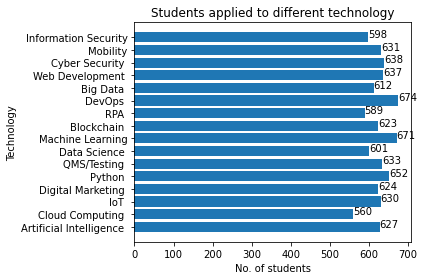

In [658]:
names = list(category_counts.keys())
values = list(category_counts.values())
rcParams.update({'figure.autolayout': True})
plt.barh(names, values)
for index, value in enumerate(values):
    plt.text(value, index, str(value))
plt.xlabel("No. of students")
plt.ylabel("Technology")
plt.title("Students applied to different technology")
pp=PdfPages('visualization-output.pdf')
plt.savefig(pp, format='pdf')

    2. The number of students applied for Data Science who knew "Python" and who didn’t

In [659]:
df2=df[["Areas of interest","Knowing of Python","Current Employment Status"]]

In [660]:
df_group_two=df2.groupby(["Areas of interest","Knowing of Python"],as_index=False).count()

In [661]:
df_group_two.rename(columns = {'Current Employment Status':"No. of students"}, inplace = True) 

In [662]:
a=df_group_two.iloc[[10,11],:]
a=a[["Knowing of Python","No. of students"]]

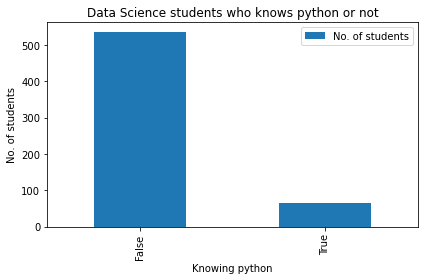

In [663]:
rcParams.update({'figure.autolayout': True})
a.plot(x="Knowing of Python",y="No. of students",kind="bar")
plt.xlabel("Knowing python")
plt.ylabel("No. of students")
plt.title("Data Science students who knows python or not")
plt.savefig(pp, format='pdf')

    3. The different ways students learned about this program

In [664]:
b=df["How Did You Hear About This Internship?"]
categories_1=list(b)

In [665]:
category_counts_1 = {}
for category in categories_1:
    try:
        category_counts_1[category] += 1
    except:
        category_counts_1[category] = 1

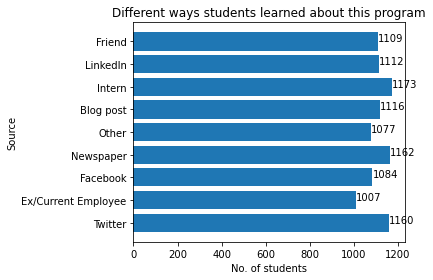

In [666]:
name = list(category_counts_1.keys())
value = list(category_counts_1.values())
rcParams.update({'figure.autolayout': True})
plt.barh(name, value)
for index, value1 in enumerate(value):
    plt.text(value1, index, str(value1))
plt.xlabel("No. of students")
plt.ylabel("Source")
plt.title("Different ways students learned about this program")
plt.savefig(pp, format='pdf')

     Q4. Students who are in the fourth year and have a CGPA greater than 8.0

In [667]:
df4=df[["Which-year are you studying in?","CGPA/ percentage"]]

In [668]:
df4=df4[df4["Which-year are you studying in?"].str.contains("Fourth-year")]

In [669]:
df4=df4[df4["CGPA/ percentage"]>=8.0]

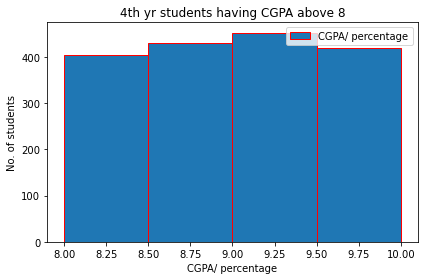

In [670]:
rcParams.update({'figure.autolayout': True})
df4.plot(kind="hist",bins=4,edgecolor="red")
plt.xlabel("CGPA/ percentage")
plt.ylabel("No. of students")
plt.title("4th yr students having CGPA above 8")
plt.savefig(pp, format='pdf')

     Q5. Students who applied for Digital Marketing with verbal and written communication score greater than 8

In [671]:
df5=df[["Areas of interest","Rate your written communication skills [1-10]","Rate your verbal communication skills [1-10]"]]

In [672]:
df5=df5[df5["Areas of interest"].str.contains("Digital Marketing")]

In [673]:
df5= df5[df5["Rate your written communication skills [1-10]"]>=8.0]
df5= df5[df5["Rate your verbal communication skills [1-10]"]>=8.0]

In [674]:
df_group_5=df5.groupby(["Areas of interest"],as_index=False).count()

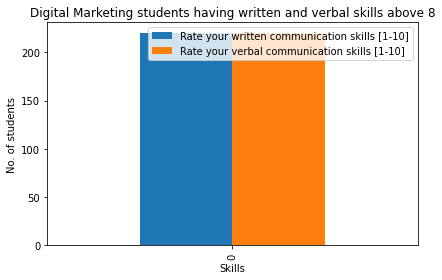

In [675]:
rcParams.update({'figure.autolayout': True})
df_group_5.plot(kind="bar")
plt.xlabel("Skills")
plt.ylabel("No. of students")
plt.title("Digital Marketing students having written and verbal skills above 8")
plt.savefig(pp, format='pdf')

     Q6. Year-wise and area of study wise classification of students

In [676]:
df6=df[["Major/Area of Study","Which-year are you studying in?","Areas of interest"]]

In [677]:
df_group_six=df6.groupby(["Major/Area of Study","Which-year are you studying in?"],as_index=False).count()
df_group_six

,Major/Area of Study,Which-year are you studying in?,Areas of interest
0,Computer Engineering,First-year,1470
1,Computer Engineering,Fourth-year,1516
2,Computer Engineering,Second-year,1536
3,Computer Engineering,Third-year,1449
4,Electrical Engineering,First-year,490
5,Electrical Engineering,Fourth-year,464
6,Electrical Engineering,Second-year,518
7,Electrical Engineering,Third-year,561
8,Electronics and Telecommunication,First-year,550
9,Electronics and Telecommunication,Fourth-year,497


In [678]:
df_group_six.rename(columns = {'Areas of interest':"No. of students"}, inplace = True) 

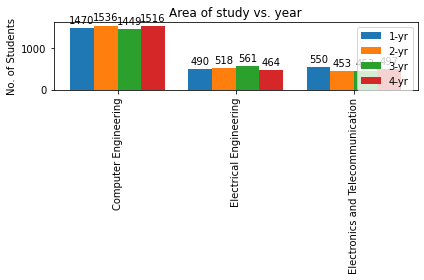

In [679]:
labels = ['Computer Engineering','Electrical Engineering','Electronics and Telecommunication']
Firstyear = [1470, 490, 550]
Secondyear = [1536,518,453]
Thirdyear=[1449,561,453]
Fourthyear=[1516,464,497]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars
rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots()
rects1 = ax.bar(x - width*(3/4), Firstyear, width/2, label='1-yr')
rects2 = ax.bar(x - width/4, Secondyear, width/2, label='2-yr')
rects3 = ax.bar(x + width/4, Thirdyear, width/2, label='3-yr')
rects4 = ax.bar(x + width*(3/4), Fourthyear, width/2, label='4-yr')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Students')
ax.set_title('Area of study vs. year')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

#fig.tight_layout()

plt.savefig(pp, format='pdf')

    Q7. City and college wise classification of students

In [680]:
df7=df[["City","College name","Areas of interest"]]

In [681]:
df7.rename(columns = {'Areas of interest':"No. of students"}, inplace = True) 

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [682]:
df_group_7=df7.groupby(["City","College name"],as_index=False).count()

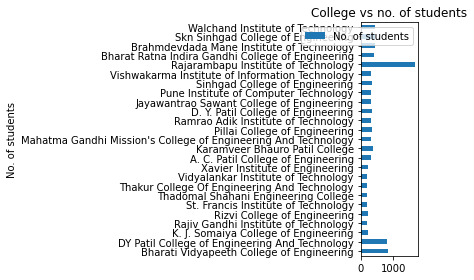

In [683]:
rcParams.update({'figure.autolayout': True})
df_group_7.plot(x="College name",y="No. of students",kind="barh")
plt.ylabel("No. of students")
plt.title("College vs no. of students")
plt.savefig(pp, format='pdf')

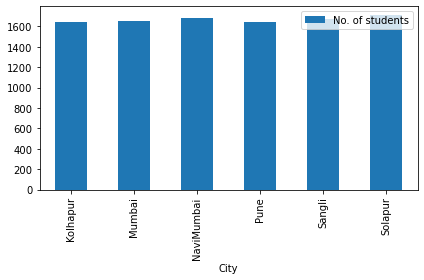

In [684]:
df_group_71=df7.groupby(["City"],as_index=False).count()
rcParams.update({'figure.autolayout': True})
df_group_71.plot(x="City",y="No. of students",kind="bar")
plt.savefig(pp, format='pdf')

    Q8. Plot the relationship between the CGPA and the target variable

In [685]:
df8=df[["CGPA/ percentage","Label"]]

In [686]:
p=df8[df8["CGPA/ percentage"].between(7.0,7.9999)]
q=df8[df8["CGPA/ percentage"].between(8.0,8.9999)]
r=df8[df8["CGPA/ percentage"].between(9.0,10.0)]

In [687]:
df_group_p=p.groupby(["Label"],as_index=False).count()

In [688]:
df_group_q=q.groupby(["Label"],as_index=False).count()

In [689]:
df_group_r=r.groupby(["Label"],as_index=False).count()

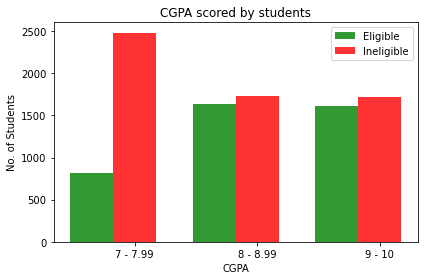

In [690]:
n_groups = 3
eligible = (815,1635,1613)
ineligible = (2481,1734,1722)
rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, eligible, bar_width,
alpha=opacity,
color='g',
label='Eligible')

rects2 = plt.bar(index + bar_width, ineligible, bar_width,
alpha=opacity,
color='r',
label='Ineligible')

plt.xlabel('CGPA')
plt.ylabel('No. of Students')
plt.title('CGPA scored by students')
plt.xticks(index + bar_width, ("7 - 7.99","8 - 8.99","9 - 10"))
plt.legend()

plt.tight_layout()
plt.savefig(pp, format='pdf')

    Q9. Plot the relationship between the Area of interest and the target variable

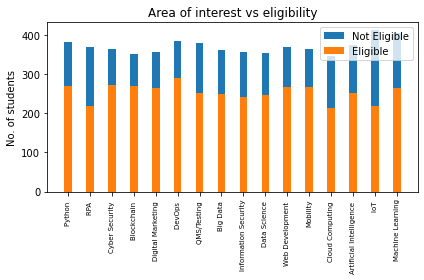

In [691]:
width=0.35
le=[]
lie=[]
m=list(df["Areas of interest"])
n=list(set(m))

front=df["Label"]
df.drop(labels=["Label"],axis=1,inplace=True)
df.insert(0,"Label",front)

o=df.Label
o=list(o)
for i in range(len(n)):
    e=0
    ie=0
    for j in range(len(m)):
        if n[i]==m[j]:
            if o[j]==o[1]:
                e=e+1
            else:
                ie=ie+1
    le.append(e)
    lie.append(ie)
rcParams.update({'figure.autolayout': True})   
index=np.arange(len(n))
p1=plt.bar(index,lie,width)
p2=plt.bar(index,le,width)
plt.ylabel("No. of students")
plt.xticks(index,n,fontsize=7,rotation="vertical")
plt.legend((p1[0],p2[0]),("Not Eligible","Eligible"))
plt.title("Area of interest vs eligibility")
plt.savefig(pp, format='pdf')

     Q10 Plot the relationship between the year of study, major, and the target variable

In [692]:
df10=df[["Major/Area of Study","Which-year are you studying in?","Label","Areas of interest"]]

In [693]:
df10["Label"]=df10['Label'].map({'eligible': 1, 'ineligible': 0})

<ipython-input-693-0b5c48714c73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10["Label"]=df10['Label'].map({'eligible': 1, 'ineligible': 0})


In [694]:
df_group_ten=df10.groupby(["Major/Area of Study","Which-year are you studying in?","Label"],as_index=False).count()

In [695]:
df_group_ten.rename(columns = {'Areas of interest':"No. of students"}, inplace = True) 

In [696]:
df_group_ten["Major/Area of Study"]=df_group_ten['Major/Area of Study'].map({'Electronics and Telecommunication': "ECE", 'Electrical Engineering': "EE","Computer Engineering":"CSE"})
df_group_ten["Which-year are you studying in?"]=df_group_ten['Which-year are you studying in?'].map({"First-year":"FE","Second-year":"SE","Third-year":"TE","Fourth-year":"BE"})

In [697]:
df101=df_group_ten["Major/Area of Study"].map(str)+"-"+df_group_ten["Which-year are you studying in?"].map(str)+"-"+df_group_ten["Label"].map(str)

In [698]:
df102=pd.concat([df101, df_group_ten["No. of students"]], axis=1, sort=False)

In [699]:
c=df102.rename(columns={"0":"Category of student"})

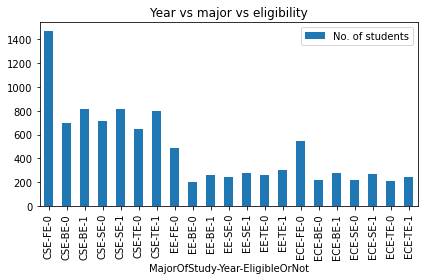

In [700]:
rcParams.update({'figure.autolayout': True})
c.plot(x=0,y="No. of students",kind="bar")
plt.xlabel("MajorOfStudy-Year-EligibleOrNot")
plt.title("Year vs major vs eligibility")
plt.savefig(pp, format='pdf')
pp.close()